In [472]:
# Dependencies

import requests as req
from citipy import citipy
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
from citipy import citipy
import random

In [473]:
# Creating a function to generate 1500 randon floating number between two values : low and high 

def sample_floats(low, high, k=2000):
    result = []
    seen = set()
    for i in range(k):
        x = random.uniform(low, high)
        while x in seen:
            x = random.uniform(low, high)
        seen.add(x)
        result.append(x)
    return result
   

In [474]:
# Calling the function created above to get 1500 values for latitudes and longitudes

latitudes = sample_floats(-90.0, 90.0)
longitudes = sample_floats(-180.0, 180.0)


In [475]:
# For all the latitude and longitude values generated above we try to finf out the nearest city and its country code
# to those intersecrtion using the citipy library and store it in lists.

city_list = []
country_codes = []
for i in range(0, 2000):
    city_inst = citipy.nearest_city(latitudes[i], longitudes[i])
    city = city_inst.city_name
    country_code = city_inst.country_code
    city_list.append(city)
    country_codes.append(country_code)
print(math.ceil(len(city_list)/50))

40


In [476]:
# Create a csv list comprising of all the city and the corresponding country codes

result_file = open("ListOfCities1.csv", 'w')
result_file.write("city" +','+"country_code"+"\n")
for c,cc in zip(city_list,country_codes):
    result_file.write(str(c)+','+str(cc)+"\n")
result_file.close()

In [477]:
# Creating a standard url with the api key that may be used to make api requests to get the data

api_key = "a92cbfddbac4c2223717e380f50b779f"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [478]:
# Reading the csv file with city names and country codes into a panda dataframe

city_data = pd.read_csv("ListOfCities1.csv", encoding='cp1252')
city = city_data['city']
country_code = city_data['country_code']
city[0]
len(city)

2000

In [479]:
# Data retrieval via sending api requests.


p = 0
q = 50
no_of_sets = math.ceil(len(city_list)/50)
data = []
print('Begining Data Retrival')
print('---------------------------------')
with open('weather_data.json', 'w') as wd:
    for x in range(1,no_of_sets+1):
        count = 0
#       json.dump([req.get(query_url + city[i] + "," + country_code[i], params={'page': x}).json()], wd)
        for i in range(p,q):
            print("Processing record "  + str(count) + " of " + str(x) + " | " + city[i] + "," + country_code[i])
            response = req.get(query_url + city[i] + "," + country_code[i], params={'page': x})
            data.append(response.json())
            print(query_url+city[i].replace(' ', ''))
            count+=1
        p+=50
        if(q+50 > len(city)):
            q = len(city)
        else:
            q+=50





Begining Data Retrival
---------------------------------
Processing record 0 of 1 | zolotinka,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=zolotinka
Processing record 1 of 1 | provideniya,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=provideniya
Processing record 2 of 1 | salalah,om
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=salalah
Processing record 3 of 1 | pevek,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=pevek
Processing record 4 of 1 | jamestown,sh
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=jamestown
Processing record 5 of 1 | rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=rikitea
Processing record 6 of 1 | eyrarbakki

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kodiak
Processing record 5 of 2 | bredasdorp,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=bredasdorp
Processing record 6 of 2 | arraial do cabo,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=arraialdocabo
Processing record 7 of 2 | perama,gr
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=perama
Processing record 8 of 2 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 9 of 2 | media luna,cu
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=medialuna
Processing record 10 of 2 | erzin,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=newnorfolk
Processing record 9 of 3 | taolanaro,mg
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=taolanaro
Processing record 10 of 3 | oranjemund,na
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=oranjemund
Processing record 11 of 3 | ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=ushuaia
Processing record 12 of 3 | hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hilo
Processing record 13 of 3 | jalu,ly
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=jalu
Processing record 14 of 3 | arraial do cabo,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=atuona
Processing record 14 of 4 | illoqqortoormiut,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=illoqqortoormiut
Processing record 15 of 4 | puerto leguizamo,co
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=puertoleguizamo
Processing record 16 of 4 | cabo san lucas,mx
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=cabosanlucas
Processing record 17 of 4 | qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=qaanaaq
Processing record 18 of 4 | tasiilaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=tasiilaq
Processing record 19 of 4 | busselton,au
http://api.openweathermap.org/data/2.5/weather?app

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=butaritari
Processing record 18 of 5 | margate,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=margate
Processing record 19 of 5 | saskylakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=saskylakh
Processing record 20 of 5 | aklavik,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=aklavik
Processing record 21 of 5 | carnarvon,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=carnarvon
Processing record 22 of 5 | punta arenas,cl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=puntaarenas
Processing record 23 of 5 | nikolskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=greenriver
Processing record 23 of 6 | mar del plata,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mardelplata
Processing record 24 of 6 | lebu,cl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=lebu
Processing record 25 of 6 | new norfolk,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=newnorfolk
Processing record 26 of 6 | orlik,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=orlik
Processing record 27 of 6 | airai,pw
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=airai
Processing record 28 of 6 | hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imper

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=khatanga
Processing record 28 of 7 | nikolskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=nikolskoye
Processing record 29 of 7 | margate,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=margate
Processing record 30 of 7 | kazerun,ir
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kazerun
Processing record 31 of 7 | nikolskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=nikolskoye
Processing record 32 of 7 | albany,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=albany
Processing record 33 of 7 | umzimvubu,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&u

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=caldelas
Processing record 32 of 8 | coahuayana,mx
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=coahuayana
Processing record 33 of 8 | sarab,ir
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=sarab
Processing record 34 of 8 | saint anthony,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=saintanthony
Processing record 35 of 8 | atuona,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=atuona
Processing record 36 of 8 | hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hilo
Processing record 37 of 8 | ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=im

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=langsa
Processing record 37 of 9 | inuvik,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=inuvik
Processing record 38 of 9 | ribas do rio pardo,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=ribasdoriopardo
Processing record 39 of 9 | hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hobart
Processing record 40 of 9 | yellowknife,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=yellowknife
Processing record 41 of 9 | sogdiondon,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=sogdiondon
Processing record 42 of 9 | beringovskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=normanwells
Processing record 41 of 10 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 42 of 10 | zamora,es
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=zamora
Processing record 43 of 10 | quatre cocos,mu
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=quatrecocos
Processing record 44 of 10 | port alfred,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=portalfred
Processing record 45 of 10 | hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hobart
Processing record 46 of 10 | oranjestad,aw
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e3

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kamenskoye
Processing record 45 of 11 | comodoro rivadavia,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=comodororivadavia
Processing record 46 of 11 | wagga wagga,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=waggawagga
Processing record 47 of 11 | mingaora,pk
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mingaora
Processing record 48 of 11 | rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=rikitea
Processing record 49 of 11 | yellowknife,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=yellowknife
Processing record 0 of 12 | hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=a92c

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 0 of 13 | jamestown,sh
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=jamestown
Processing record 1 of 13 | sentyabrskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=sentyabrskiy
Processing record 2 of 13 | atuona,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=atuona
Processing record 3 of 13 | hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hilo
Processing record 4 of 13 | quelimane,mz
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=quelimane
Processing record 5 of 13 | torbay,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=carnarvon
Processing record 4 of 14 | cape town,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=capetown
Processing record 5 of 14 | chokurdakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=chokurdakh
Processing record 6 of 14 | busselton,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=busselton
Processing record 7 of 14 | sao jose da coroa grande,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=saojosedacoroagrande
Processing record 8 of 14 | khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=khatanga
Processing record 9 of 14 | vaitupu,wf
http://api.openweathermap.org/data/2.5/weather?appid=

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=pevek
Processing record 8 of 15 | merauke,id
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=merauke
Processing record 9 of 15 | haibowan,cn
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=haibowan
Processing record 10 of 15 | bundaberg,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=bundaberg
Processing record 11 of 15 | iquique,cl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=iquique
Processing record 12 of 15 | ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=ushuaia
Processing record 13 of 15 | hasaki,jp
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=i

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=provideniya
Processing record 12 of 16 | patti,in
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=patti
Processing record 13 of 16 | richards bay,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=richardsbay
Processing record 14 of 16 | preobrazheniye,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=preobrazheniye
Processing record 15 of 16 | tsihombe,mg
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=tsihombe
Processing record 16 of 16 | avarua,ck
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=avarua
Processing record 17 of 16 | soto la marina,mx
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=puntaarenas
Processing record 16 of 17 | saijo,jp
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=saijo
Processing record 17 of 17 | dikson,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=dikson
Processing record 18 of 17 | inuvik,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=inuvik
Processing record 19 of 17 | cidreira,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=cidreira
Processing record 20 of 17 | qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=qaanaaq
Processing record 21 of 17 | port-gentil,ga
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kapaa
Processing record 21 of 18 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 22 of 18 | tasiilaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=tasiilaq
Processing record 23 of 18 | hermanus,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hermanus
Processing record 24 of 18 | vaini,to
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vaini
Processing record 25 of 18 | jamestown,sh
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=jamestown
Processing record 26 of 18 | fare,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=georgetown
Processing record 25 of 19 | severo-kurilsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=severo-kurilsk
Processing record 26 of 19 | polessk,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=polessk
Processing record 27 of 19 | hualmay,pe
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hualmay
Processing record 28 of 19 | rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=rikitea
Processing record 29 of 19 | busselton,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=busselton
Processing record 30 of 19 | qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=dikson
Processing record 29 of 20 | bethel,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=bethel
Processing record 30 of 20 | illoqqortoormiut,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=illoqqortoormiut
Processing record 31 of 20 | bluff,nz
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=bluff
Processing record 32 of 20 | mackenzie,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mackenzie
Processing record 33 of 20 | rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=rikitea
Processing record 34 of 20 | mogadishu,so
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=aosta
Processing record 34 of 21 | tuggurt,dz
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=tuggurt
Processing record 35 of 21 | punta arenas,cl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=puntaarenas
Processing record 36 of 21 | half moon bay,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=halfmoonbay
Processing record 37 of 21 | yellowknife,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=yellowknife
Processing record 38 of 21 | oranjemund,na
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=oranjemund
Processing record 39 of 21 | ballina,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddba

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=aitape
Processing record 38 of 22 | taoudenni,ml
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=taoudenni
Processing record 39 of 22 | dikson,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=dikson
Processing record 40 of 22 | nemuro,jp
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=nemuro
Processing record 41 of 22 | nikolskoye,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=nikolskoye
Processing record 42 of 22 | cape town,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=capetown
Processing record 43 of 22 | olinda,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&u

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=sorland
Processing record 42 of 23 | san carlos de bariloche,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=sancarlosdebariloche
Processing record 43 of 23 | oskarshamn,se
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=oskarshamn
Processing record 44 of 23 | bethel,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=bethel
Processing record 45 of 23 | nerl,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=nerl
Processing record 46 of 23 | ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=ushuaia
Processing record 47 of 23 | qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vaitupu
Processing record 46 of 24 | jamestown,sh
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=jamestown
Processing record 47 of 24 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 48 of 24 | punta arenas,cl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=puntaarenas
Processing record 49 of 24 | port alfred,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=portalfred
Processing record 0 of 25 | vikulovo,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vikulovo
Processing record 1 of 25 | mahebourg,mu
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c222371

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=aksarayskiy
Processing record 1 of 26 | san andres,co
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=sanandres
Processing record 2 of 26 | piacabucu,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=piacabucu
Processing record 3 of 26 | cherskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=cherskiy
Processing record 4 of 26 | albany,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=albany
Processing record 5 of 26 | porto novo,cv
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=portonovo
Processing record 6 of 26 | kapaa,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=teanau
Processing record 5 of 27 | vestmannaeyjar,is
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vestmannaeyjar
Processing record 6 of 27 | durusu,tr
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=durusu
Processing record 7 of 27 | acapulco,mx
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=acapulco
Processing record 8 of 27 | dangriga,bz
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=dangriga
Processing record 9 of 27 | bathsheba,bb
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=bathsheba
Processing record 10 of 27 | barra da estiva,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c222371

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=ahipara
Processing record 9 of 28 | atuona,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=atuona
Processing record 10 of 28 | cape town,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=capetown
Processing record 11 of 28 | khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=khatanga
Processing record 12 of 28 | khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=khatanga
Processing record 13 of 28 | ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=ushuaia
Processing record 14 of 28 | tiksi,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=grandriversoutheast
Processing record 13 of 29 | hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hobart
Processing record 14 of 29 | fonte boa,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=fonteboa
Processing record 15 of 29 | belushya guba,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=belushyaguba
Processing record 16 of 29 | kodiak,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kodiak
Processing record 17 of 29 | kangaatsiaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kangaatsiaq
Processing record 18 of 29 | namibe,ao
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=uvinza
Processing record 16 of 30 | katsuura,jp
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=katsuura
Processing record 17 of 30 | kodiak,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kodiak
Processing record 18 of 30 | storforshei,no
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=storforshei
Processing record 19 of 30 | verkhnyaya inta,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=verkhnyayainta
Processing record 20 of 30 | maridi,sd
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=maridi
Processing record 21 of 30 | barentsburg,sj
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vaini
Processing record 19 of 31 | pervomayskoye,ua
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=pervomayskoye
Processing record 20 of 31 | port alfred,za
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=portalfred
Processing record 21 of 31 | hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hobart
Processing record 22 of 31 | lagoa,pt
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=lagoa
Processing record 23 of 31 | vaini,to
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vaini
Processing record 24 of 31 | nizhneyansk,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b77

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=carnarvon
Processing record 22 of 32 | bethel,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=bethel
Processing record 23 of 32 | vaini,to
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vaini
Processing record 24 of 32 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 25 of 32 | krasnoselkup,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=krasnoselkup
Processing record 26 of 32 | harrisonville,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=harrisonville
Processing record 27 of 32 | longyearbyen,sj
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c22237

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=yaya
Processing record 26 of 33 | denpasar,id
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=denpasar
Processing record 27 of 33 | pangnirtung,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=pangnirtung
Processing record 28 of 33 | springdale,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=springdale
Processing record 29 of 33 | whyalla,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=whyalla
Processing record 30 of 33 | klaksvik,fo
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=klaksvik
Processing record 31 of 33 | chokurdakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e38

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=chuy
Processing record 30 of 34 | olafsvik,is
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=olafsvik
Processing record 31 of 34 | marawi,sd
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=marawi
Processing record 32 of 34 | saint george,bm
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=saintgeorge
Processing record 33 of 34 | qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=qaanaaq
Processing record 34 of 34 | georgetown,sh
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=georgetown
Processing record 35 of 34 | port augusta,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=portelizabeth
Processing record 34 of 35 | saint-augustin,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=saint-augustin
Processing record 35 of 35 | vila velha,br
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vilavelha
Processing record 36 of 35 | cockburn town,bs
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=cockburntown
Processing record 37 of 35 | qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=qaanaaq
Processing record 38 of 35 | kibala,ao
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kibala
Processing record 39 of 35 | vila velha,br
http://api.openweathermap.org/data/2.5/weather?appid=a92c

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=puertoayora
Processing record 38 of 36 | kasongo,cd
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kasongo
Processing record 39 of 36 | prince rupert,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=princerupert
Processing record 40 of 36 | barrow,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=barrow
Processing record 41 of 36 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 42 of 36 | pevek,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=pevek
Processing record 43 of 36 | khatanga,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=kapaa
Processing record 42 of 37 | taolanaro,mg
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=taolanaro
Processing record 43 of 37 | vila,vu
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vila
Processing record 44 of 37 | rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=rikitea
Processing record 45 of 37 | hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=hilo
Processing record 46 of 37 | vaini,to
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=vaini
Processing record 47 of 37 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=matau

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=richardsbay
Processing record 46 of 38 | albany,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=albany
Processing record 47 of 38 | pavino,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=pavino
Processing record 48 of 38 | nuuk,gl
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=nuuk
Processing record 49 of 38 | mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mataura
Processing record 0 of 39 | esperance,au
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=esperance
Processing record 1 of 39 | oktyabrskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=im

http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=busselton
Processing record 49 of 39 | provideniya,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=provideniya
Processing record 0 of 40 | butaritari,ki
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=butaritari
Processing record 1 of 40 | torbay,ca
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=torbay
Processing record 2 of 40 | ponta do sol,pt
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=pontadosol
Processing record 3 of 40 | mahebourg,mu
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c2223717e380f50b779f&units=imperial&q=mahebourg
Processing record 4 of 40 | tumannyy,ru
http://api.openweathermap.org/data/2.5/weather?appid=a92cbfddbac4c222371

In [499]:
weather_data_file = open("Weather_data.csv", 'w')
weather_data_file.write("data")
weather_data_file.close()

In [480]:
# Retrieving and storing the required values in the variables
temp_data = []
humidity_data = []
cloudiness_data = []
wind_speed_data = []
lat_data = []

for i in range(0,len(data)):
    try:
        lat_data.append(data[i].get("coord").get("lat"))
        temp_data.append(data[i].get("main").get("temp_max"))
        humidity_data.append(data[i].get("main").get("humidity"))
        cloudiness_data.append(data[i].get("clouds").get("all"))
        wind_speed_data.append(data[i].get("wind").get("speed"))
    except AttributeError:
        print(str(i) + ": " + str(data[i]))


176: {'cod': '404', 'message': 'city not found'}
341: {'cod': '404', 'message': 'city not found'}
659: {'cod': '404', 'message': 'city not found'}
803: {'cod': '404', 'message': 'city not found'}
837: {'cod': '404', 'message': 'city not found'}
973: {'cod': '404', 'message': 'city not found'}
1178: {'cod': '404', 'message': 'city not found'}
1195: {'cod': '404', 'message': 'city not found'}
1218: {'cod': '404', 'message': 'city not found'}
1289: {'cod': '404', 'message': 'city not found'}
1471: {'cod': '404', 'message': 'city not found'}
1590: {'cod': '404', 'message': 'city not found'}
1658: {'cod': '404', 'message': 'city not found'}


In [481]:
# creating a data frame weather_data to store the above extracted values in columns

weather_data = {"temperature": temp_data, "humidity": humidity_data,"cloudiness": cloudiness_data,
"windy":wind_speed_data, "lat": lat_data}
weather_data = pd.DataFrame(weather_data)


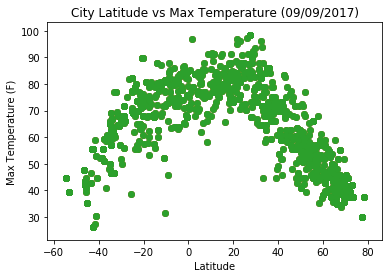

In [494]:
# plot of variation of temperature wrt to latitude

plt.scatter(weather_data["lat"], weather_data["temperature"], marker="o")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Max Temperature (09/09/2017)")
plt.show()

# As can be seen in the plot, the temperature drops the further you moove away from the equator. This makes sense
# because as you move away from the equator, the sun light you recieve is less due to the shape of the earth.
# As a result, the rays towards equator the heat from the sun is more intense (sun rays strike at right angle) thereby
# causing high temperature.

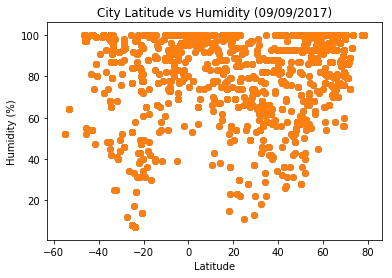

In [496]:
# plot of variation of humidity wrt to latitude

plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (09/09/2017)")
plt.show()

# The humidity at a location does not seem to be following any clear relationship with its latitude. But as seen in 
# the plot, the places near the equator, between 20 degrees above and below the equator, we have very highly humid 
# regions. There are regions of low humidity near 20 degrees, and again the humidity rises as we move towards poles.

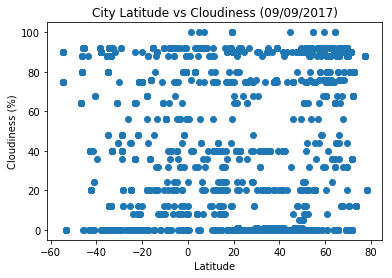

In [497]:
# plot of variation of cloudiness wrt to latitude

plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (09/09/2017)")
plt.show()

# As can be seen from the plot, the cloudiness is increased at locations near equator. Near the equator, increased 
# cloudiness is due to the presence of the low-pressure Intertropical Convergence Zone (ITCZ) where very warm and 
# unstable air promotes mostly cumuliform and cumulonimbiform clouds.

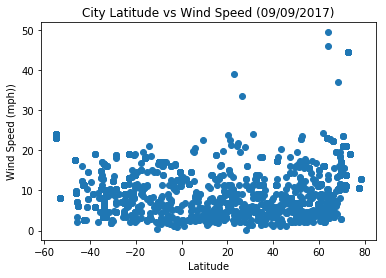

In [498]:
# plot of variation of wind wrt to latitude

plt.scatter(weather_data["lat"], weather_data["windy"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.title("City Latitude vs Wind Speed (09/09/2017)")
plt.show()

# The wind speed at a location does not seem to be following any direct relationship with its latitude.